In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.decomposition import PCA
from itertools import product
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as yPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve , plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)

from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn import preprocessing



ModuleNotFoundError: No module named 'imblearn'

In [188]:
df_train=pd.read_csv("../Dataset_prepared/Prepared_train.csv")
df_test=pd.read_csv("../Dataset_prepared/Prepared_test.csv")

In [189]:
df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)

df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)

In [190]:
tmp=[8,249,292,308,309,311,382,554,832,1247,1283,1358,1481,1492,1702,1703,1704,1756,1757,1758,1801]

df_train.drop(tmp,axis=0)

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,mean,q25,q50,q75,...,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,9.150000e-07,-0.000031,0.0,0.000000,...,-4.175609,740.409892,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,7.137790e-07,-0.000031,0.0,0.000000,...,-1.100390,705.975006,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,9.554485e-07,0.000000,0.0,0.000000,...,-3.120218,694.365924,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,9.176213e-07,-0.000031,0.0,0.000000,...,-0.880988,663.205667,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,8.108948e-07,-0.000031,0.0,0.000000,...,-1.071109,741.412796,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,speech,surprised,normal,Dogs are sitting by the door,2nd,F,-9.186051e-07,0.000000,0.0,0.000031,...,-1.472070,660.790616,0.000000,0.000000,0.542632,0.728154,0.893268,1.0,0.262900,-1.051814
1824,speech,surprised,strong,Kids are talking by the door,1st,F,-8.001086e-07,-0.000031,0.0,0.000031,...,-1.301303,634.120979,0.000000,0.000000,0.375423,0.702983,0.900089,1.0,-0.857759,-0.608583
1825,speech,surprised,strong,Kids are talking by the door,2nd,F,-1.242670e-06,0.000000,0.0,0.000031,...,-1.472613,631.801688,0.000000,0.097608,0.446789,0.686781,0.891486,1.0,-0.656632,-0.586954
1826,speech,surprised,strong,Dogs are sitting by the door,1st,F,-4.622332e-07,-0.000031,0.0,0.000092,...,-1.160818,680.117724,0.000000,0.000000,0.484284,0.712452,0.869563,1.0,-0.499022,-0.849045


In [191]:
le=preprocessing.LabelEncoder()
c = df_train.select_dtypes(include=['object']).columns.tolist()
for i in c:
    df_train[i]=le.fit_transform(df_train[i])

for i in c:
    df_test[i]=le.fit_transform(df_test[i])

In [192]:
scaler = StandardScaler()
numeric_features = [n for n in df_train.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and n!="filename" and n!="actor"]
scaled_features = scaler.fit_transform(df_train[numeric_features])
df_train[numeric_features] = scaled_features


scaled_features_test = scaler.transform(df_test[numeric_features])
df_test[numeric_features] = scaled_features_test

In [193]:
col=[x for x in df_train.columns if x!="emotion"]
X_train=df_train[col].values
y_train = np.array(df_train["emotion"])

In [194]:
X_test=df_test[col].values
y_test = np.array(df_test["emotion"])

### Normalizzazione + plot grafico iniziale 

In [195]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [196]:
from sklearn.decomposition import PCA

In [197]:
pca = PCA(n_components=1)
pca.fit(X_train)
X_pca = pca.transform(X_train)

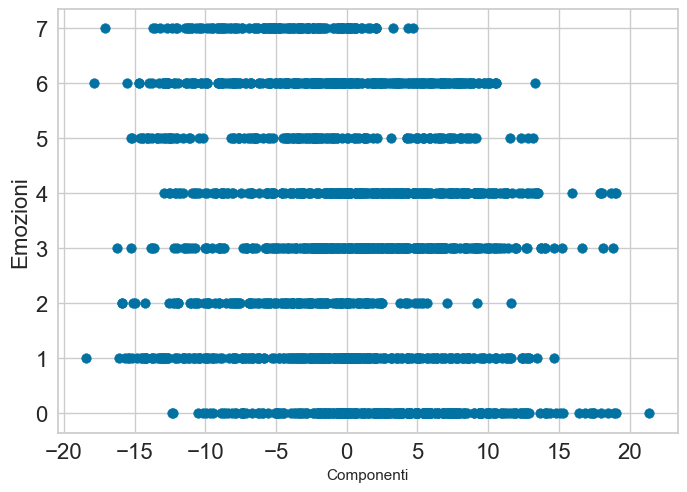

In [198]:
plt.scatter(X_pca,y_train)
plt.xlabel('Componenti')
plt.ylabel("Emozioni",fontsize=16)
plt.tick_params(axis='both',which='major',labelsize=16)
plt.show()

### Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [228]:
clf = LogisticRegression(random_state=42,max_iter =500)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [230]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.46314102564102566
F1-score [0.5826087  0.57798165 0.51282051 0.45       0.38297872 0.31818182
 0.28767123 0.43564356]
              precision    recall  f1-score   support

           0       0.50      0.70      0.58        96
           1       0.52      0.66      0.58        96
           2       0.43      0.62      0.51        48
           3       0.56      0.38      0.45        96
           4       0.39      0.38      0.38        96
           5       0.35      0.29      0.32        48
           6       0.42      0.22      0.29        96
           7       0.42      0.46      0.44        48

    accuracy                           0.46       624
   macro avg       0.45      0.46      0.44       624
weighted avg       0.46      0.46      0.45       624



### GRID SEARCH

In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#Set the parameters by cross-validation
param_grid = {
    'tol':(1.0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6),
    'C': (0.001, 0.05, 0.01, 0.1, 1.0, 10.0, 50, 100.0),
    'penalty' : ["l1","l2"],
    'solver':["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    'max_iter' :[800]
    
}
# Set the parameters by cross-validation
grid = GridSearchCV(
    LogisticRegression(random_state = 42),
    param_grid=param_grid,
    cv=StratifiedKFold(), # 
    refit=True,
    scoring="f1_macro"
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
/Users/francescocapoccello/opt/anaconda3/lib/python3.9/site-packa

In [242]:
print(grid.best_params_)

{'C': 0.1, 'max_iter': 800, 'penalty': 'l2', 'tol': 0.1}


In [243]:
clf = LogisticRegression(random_state=42,C=0.1,max_iter =800,penalty = 'l2',tol=0.1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=800, random_state=42, tol=0.1)

In [244]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4951923076923077
F1-score [0.64285714 0.57009346 0.51666667 0.50931677 0.3877551  0.30952381
 0.37086093 0.51020408]
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        96
           1       0.52      0.64      0.57        96
           2       0.43      0.65      0.52        48
           3       0.63      0.43      0.51        96
           4       0.38      0.40      0.39        96
           5       0.36      0.27      0.31        48
           6       0.51      0.29      0.37        96
           7       0.50      0.52      0.51        48

    accuracy                           0.50       624
   macro avg       0.49      0.49      0.48       624
weighted avg       0.50      0.50      0.48       624



### Imbalence Learning + Feature Selection

In [248]:
from imblearn.under_sampling import TomekLinks
from collections import Counter

In [202]:
clf.intercept_

array([ 1.81819741, -2.16327912, -1.8443003 ,  4.19543816,  1.5216845 ,
       -0.7121698 ,  0.01991332, -2.83548416])

In [203]:
clf.coef_

array([[-3.30059604e-01, -4.71491691e+00,  1.22014526e+00, ...,
         5.00801153e-02,  1.54214132e-01,  8.31709301e-02],
       [ 1.18054684e+00,  3.41595786e+00, -7.27194613e-01, ...,
        -1.99037949e-01, -2.47239248e-02, -1.59931796e-01],
       [ 9.44218774e-01,  1.02691704e+00, -9.87757742e-02, ...,
        -2.17117033e-02,  1.68015294e-01,  5.18098580e-01],
       ...,
       [-8.31766967e-01, -2.17931879e+00, -2.65714497e-01, ...,
        -2.19968119e-03,  6.37394247e-03, -1.21260509e-01],
       [ 5.59021570e-01,  2.35386745e+00,  4.08818854e-02, ...,
         1.69760026e-02, -3.71829673e-01, -1.90135333e-01],
       [-3.60362458e-01,  1.73968867e+00,  6.33042219e-01, ...,
        -2.31795216e-01,  3.80378792e-01,  1.20279916e-01]])

In [204]:
from scipy.special import expit

In [205]:
print(clf.coef_)
print(clf.intercept_)

[[-3.30059604e-01 -4.71491691e+00  1.22014526e+00 ...  5.00801153e-02
   1.54214132e-01  8.31709301e-02]
 [ 1.18054684e+00  3.41595786e+00 -7.27194613e-01 ... -1.99037949e-01
  -2.47239248e-02 -1.59931796e-01]
 [ 9.44218774e-01  1.02691704e+00 -9.87757742e-02 ... -2.17117033e-02
   1.68015294e-01  5.18098580e-01]
 ...
 [-8.31766967e-01 -2.17931879e+00 -2.65714497e-01 ... -2.19968119e-03
   6.37394247e-03 -1.21260509e-01]
 [ 5.59021570e-01  2.35386745e+00  4.08818854e-02 ...  1.69760026e-02
  -3.71829673e-01 -1.90135333e-01]
 [-3.60362458e-01  1.73968867e+00  6.33042219e-01 ... -2.31795216e-01
   3.80378792e-01  1.20279916e-01]]
[ 1.81819741 -2.16327912 -1.8443003   4.19543816  1.5216845  -0.7121698
  0.01991332 -2.83548416]


In [206]:
clf.predict(np.array([2.5, 8.0]).reshape(-1,1))

ValueError: X has 1 features, but LogisticRegression is expecting 258 features as input.

In [ ]:
clf.predict_proba(np.array([2.5, 8.0]).reshape(-1,1))

array([[7.98800901e-03, 7.98800902e-03, 4.78021741e-01, 7.98800901e-03,
        7.98800902e-03, 4.01647332e-03, 7.98800902e-03, 4.78021741e-01],
       [1.12123734e-08, 1.12123734e-08, 4.99999969e-01, 1.12123734e-08,
        1.12123734e-08, 5.70388459e-09, 1.12123734e-08, 4.99999969e-01]])

In [ ]:
def proba(x, beta0, beta1):
    return 1/(1+np.e**(-(beta1 * x + beta0)))

In [ ]:
proba(0, clf.intercept_[0], clf.coef_[0][0])

0.64570149411739

In [ ]:
proba(2.5, clf.intercept_[0], clf.coef_[0][0])

0.28150945649939535

In [ ]:
proba(8, clf.intercept_[0], clf.coef_[0][0])

0.013140983207640976